In [9]:
import pandas as pd

# USGS earthquake data API
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.csv"

# Load dataset
df = pd.read_csv(url)

# Save to CSV
df.to_csv("earthquake_data.csv", index=False)

print("Dataset downloaded and saved successfully!")


Dataset downloaded and saved successfully!


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/earthquake_data.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9 non-null      object 
 1   latitude         9 non-null      float64
 2   longitude        9 non-null      float64
 3   depth            9 non-null      float64
 4   mag              9 non-null      float64
 5   magType          9 non-null      object 
 6   nst              8 non-null      float64
 7   gap              8 non-null      float64
 8   dmin             8 non-null      float64
 9   rms              9 non-null      float64
 10  net              9 non-null      object 
 11  id               9 non-null      object 
 12  updated          9 non-null      object 
 13  place            9 non-null      object 
 14  type             9 non-null      object 
 15  horizontalError  8 non-null      float64
 16  depthError       9 non-null      float64
 17  magErr

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-02-05T08:07:09.773Z,61.3605,-150.711200,5.4000,4.30,ml,NaN,NaN,NaN,4.95,...,2025-02-05T23:09:02.902Z,"22 km SSW of Susitna, Alaska",earthquake,NaN,0.200000,NaN,NaN,reviewed,ak,ak
1,2025-01-30T03:26:38.932Z,29.0780,-97.845000,3.6865,4.50,ml,31.0,89.0,0.1000,0.30,...,2025-02-05T03:36:43.338Z,"19 km ENE of Falls City, Texas",earthquake,1.156723,2.264497,0.200000,26.0,reviewed,tx,tx
2,2025-01-27T15:22:56.847Z,43.0657,-70.570700,10.6460,3.80,mwr,59.0,106.0,0.8540,0.62,...,2025-02-05T19:09:11.475Z,"9 km SE of York Harbor, Maine",earthquake,1.950000,4.496000,0.047000,43.0,reviewed,us,us
3,2025-01-20T16:17:26.768Z,23.1678,120.546800,16.0000,6.00,mww,151.0,29.0,0.1520,0.65,...,2025-02-03T09:24:39.265Z,"9 km ENE of Yujing, Taiwan",earthquake,4.720000,1.721000,0.044000,50.0,reviewed,us,us
4,2025-01-14T22:28:51.880Z,37.7070,-77.605833,0.1200,2.77,md,12.0,70.0,0.3351,0.33,...,2025-01-25T13:11:00.439Z,"1 km NNE of Wyndham, Virginia",earthquake,0.620000,1.650000,0.080619,9.0,reviewed,se,se


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])


Missing Values:
nst                1
gap                1
dmin               1
horizontalError    1
magError           1
magNst             1
dtype: int64


In [15]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify missing values are handled
print("Missing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64


In [17]:
# Summary statistics
df.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,30.849787,10.958346,16.056562,5.33375,119.375000,54.250000,1.660513,0.668750,4.938340,2.176812,0.067577,49.625000
std,7.838757,106.396992,14.940054,1.51713,95.116376,32.775208,1.843441,0.309444,3.345245,0.955799,0.056023,30.909719
min,18.592800,-103.240400,0.120000,2.77000,12.000000,17.000000,0.100000,0.300000,0.620000,1.650000,0.032000,9.000000
25%,27.221925,-82.665625,8.421625,4.32500,52.000000,26.250000,0.289325,0.510000,1.751681,1.721750,0.037500,25.250000
50%,30.465250,8.402150,10.323000,5.75000,118.000000,52.500000,0.917000,0.635000,5.360000,1.836000,0.045500,46.500000
75%,35.497650,103.244375,21.750000,6.35000,151.000000,74.750000,2.497250,0.750000,8.102500,1.982874,0.068905,69.000000
max,43.065700,131.530000,39.000000,7.10000,315.000000,106.000000,5.220000,1.220000,8.790000,4.496000,0.200000,96.000000


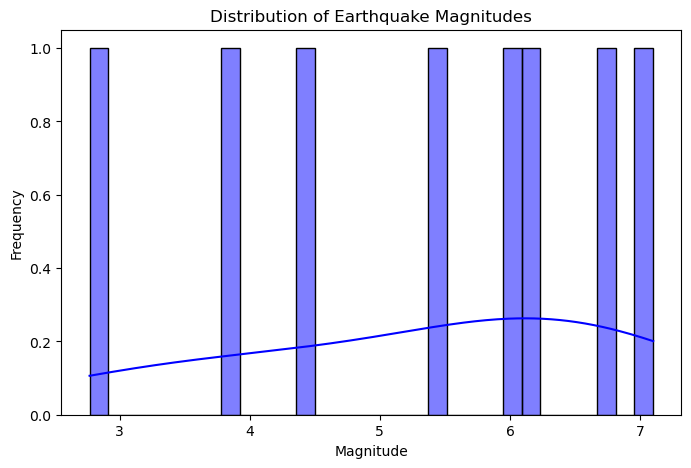

In [19]:
# Histogram of earthquake magnitudes
plt.figure(figsize=(8, 5))
sns.histplot(df['mag'], bins=30, kde=True, color='blue')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


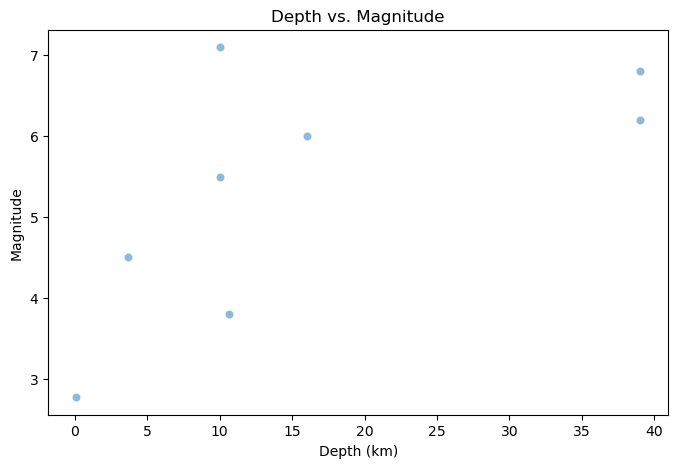

In [21]:
# Scatter plot: Depth vs. Magnitude
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['depth'], y=df['mag'], alpha=0.5)
plt.title("Depth vs. Magnitude")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()


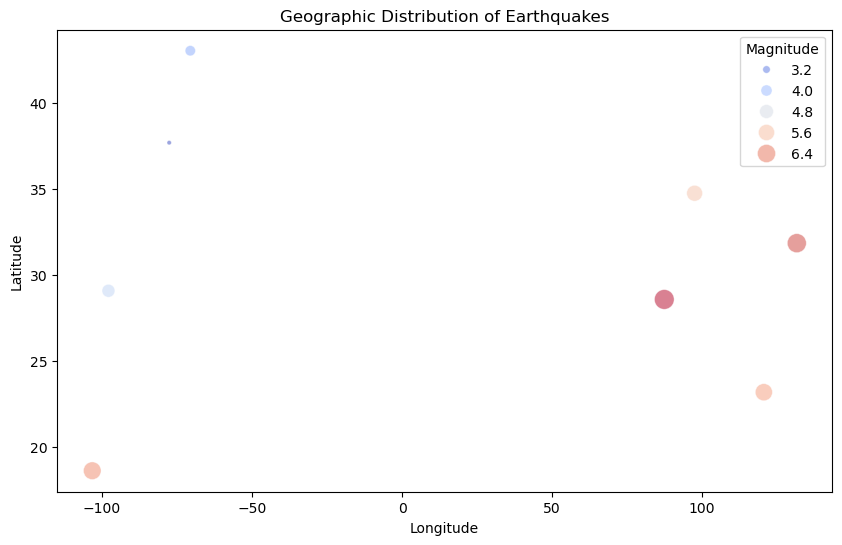

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["mag"], size=df["mag"], sizes=(10, 200), alpha=0.5, palette="coolwarm")
plt.title("Geographic Distribution of Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Magnitude")
plt.show()


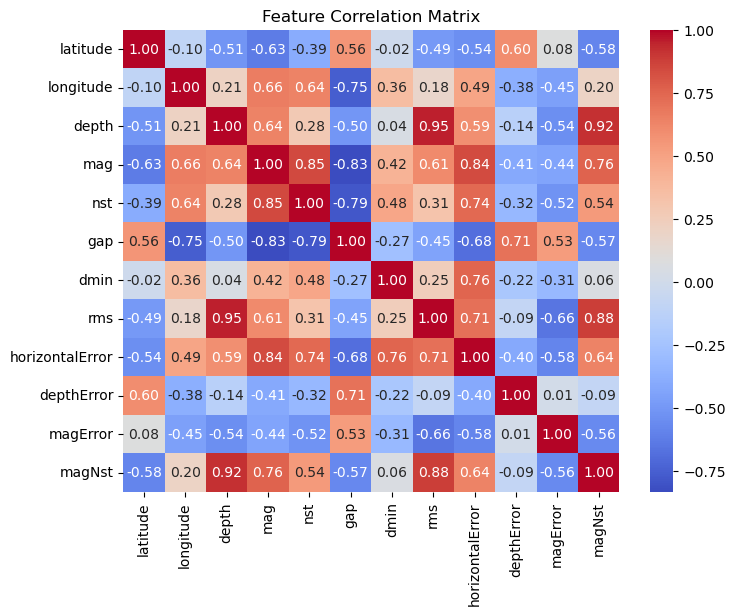

In [27]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [29]:
# Select relevant columns for modeling
df_cleaned = df[['mag', 'depth', 'latitude', 'longitude', 'nst']]

# Save cleaned dataset
df_cleaned.to_csv("../data/earthquake_cleaned.csv", index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


Mean Squared Error: 0.2705
R² Score: 0.8122
Model and scaler saved successfully.


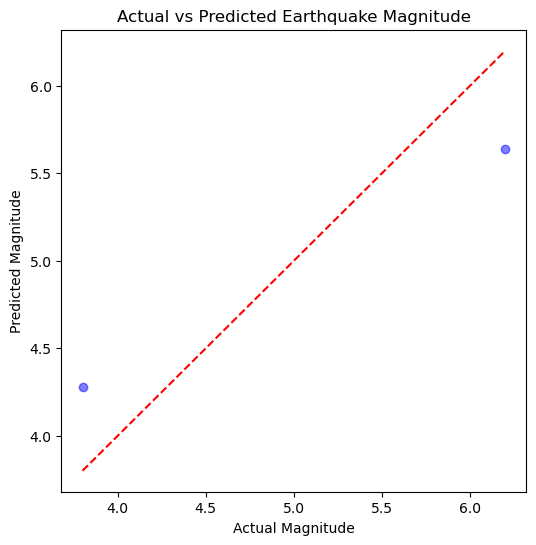

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load cleaned dataset
df = pd.read_csv("../data/earthquake_cleaned.csv")

# Define features (X) and target variable (y)
X = df[['depth', 'latitude', 'longitude', 'nst']]  # Independent variables
y = df['mag']  # Dependent variable (Magnitude)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Save the trained model and scaler
import pickle
with open("../models/random_forest.pkl", "wb") as f:
    pickle.dump(model, f)
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully.")

# Plot actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red")  # Reference line
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs Predicted Earthquake Magnitude")
plt.show()


In [33]:
import pickle
import numpy as np

# Load the trained model
with open("../models/random_forest.pkl", "rb") as f:
    model = pickle.load(f)

# Load the scaler
with open("../models/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Define new input data for prediction
# Example: depth=10 km, latitude=35.5, longitude=-120.5, nst=30 (Number of Stations)
new_data = np.array([[10, 35.5, -120.5, 30]])

# Scale the input data
new_data_scaled = scaler.transform(new_data)

# Make prediction
predicted_magnitude = model.predict(new_data_scaled)

print(f"Predicted Earthquake Magnitude: {predicted_magnitude[0]:.2f}")


Predicted Earthquake Magnitude: 4.64


C:\Users\owner\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
